In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
post_code_df = pd.read_csv('../data/raw/zipcodes_num_nl_new.csv')
post_code_df.head()

,Postcode,Plaatsnaam,Deelgemeente,Hoofdgemeente,Provincie
0,612,Sinterklaas,NaN,Sinterklaas,NaN
1,1000,Brussel,Neen,BRUSSEL,BRUSSEL
2,1005,Verenigde Vergadering van de Gemeenschappelijke,NaN,Verenigde Vergadering van de Gemeenschappelijke,BRUSSEL
3,1006,Raad van de Vlaamse Gemeenschapscommissie,NaN,Raad van de Vlaamse Gemeenschapscommissie,BRUSSEL
4,1007,Assemblée de la Commission Communautaire Franç...,NaN,Assemblée de la Commission Communautaire Franç...,BRUSSEL


In [106]:
def parse_year(year):
    return pd.to_datetime(str(year), format='%Y')

In [107]:
immo_raw_df = pd.read_csv('../data/raw/rawdata.csv', parse_dates=['Build Year'], date_format=parse_year)
# immo_raw_df = pd.read_csv('../data/raw/rawdata.csv')
immo_raw_df.head()

,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Has starting Price,Transaction Subtype,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count
0,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,False,BUY_REGULAR,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN
1,11149932,Wetteren,9230,2015,3.0,134.0,NaN,APARTMENT,DUPLEX,339000,...,False,BUY_REGULAR,GAS,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,11150061,Ixelles,1050,1958,2.0,134.0,NaN,APARTMENT,APARTMENT,495000,...,False,BUY_REGULAR,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11153822,BERCHEM,2600,1968,2.0,90.0,NaN,APARTMENT,APARTMENT,175000,...,NaN,BUY_REGULAR,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,11153121,Jette,1090,1965,2.0,80.0,NaN,APARTMENT,APARTMENT,289000,...,False,BUY_REGULAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
immo_raw_df = pd.merge(immo_raw_df, post_code_df, left_on='Postal Code', right_on='Postcode', how='inner')
del immo_raw_df['Postcode']
del immo_raw_df['Plaatsnaam']
del immo_raw_df['Deelgemeente']

immo_raw_df.rename(columns={'Hoofdgemeente':'Municipality', 'Provincie': 'Province'}, inplace=True)

immo_raw_df

,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count,Municipality,Province
0,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
1,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
2,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
3,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
4,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27234,11177746,Luik,4000,NaN,2.0,78.0,NaN,APARTMENT,DUPLEX,249000,...,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIÈGE,LUIK
27235,11177745,Thuin,6530,NaN,3.0,115.0,120.0,HOUSE,HOUSE,86000,...,CARBON,NaN,NaN,NaN,NaN,1.0,NaN,NaN,THUIN,HENEGOUWEN
27236,11177745,Thuin,6530,NaN,3.0,115.0,120.0,HOUSE,HOUSE,86000,...,CARBON,NaN,NaN,NaN,NaN,1.0,NaN,NaN,THUIN,HENEGOUWEN
27237,11177744,Charleroi,6000,NaN,2.0,116.0,NaN,APARTMENT,APARTMENT,198000,...,GAS,NaN,NaN,NaN,NaN,1.0,NaN,NaN,CHARLEROI,HENEGOUWEN


In [109]:
immo_raw_df.describe()

,ID,Postal Code,Facades,Habitable Surface,Land Surface,Price,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,Fireplace Count,Terrace Surface,Garden Surface,Living Surface,Consumption Per m2,Cadastral Income,Parking count inside,Parking count outside,Parking box count
count,2.723900e+04,27239.000000,18970.000000,26018.000000,11197.000000,2.723900e+04,26862.000000,23416.000000,20864.000000,26700.000000,9442.000000,6067.000000,16666.000000,4867.000000,13572.000000,14464.000000,27239.000000,9810.000000,10061.000000,0.0
mean,1.100452e+07,5957.904916,2.833737,138.289031,812.500313,3.782045e+05,2.571253,1.254783,1.536235,4.887753,13.057615,-0.832207,20.439998,556.717074,34.619658,236.577396,246.630603,10.493476,5.764636,NaN
std,3.658546e+05,3186.798257,0.845351,128.190021,2553.850705,2.410160e+05,1.234488,0.631441,0.820711,2.331417,32.864611,0.555402,32.084404,3090.839664,39.270783,516.918914,578.488145,437.164745,17.673077,NaN
min,7.309243e+06,1000.000000,1.000000,12.000000,0.000000,3.000000e+04,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-18.000000,0.000000,1.000000,1.000000,NaN
25%,1.102958e+07,2840.000000,2.000000,90.000000,191.000000,2.650000e+05,2.000000,1.000000,1.000000,4.000000,8.000000,-1.000000,9.000000,50.000000,27.000000,70.000000,0.000000,1.000000,1.000000,NaN
50%,1.114742e+07,6700.000000,3.000000,116.000000,365.000000,3.340000e+05,2.000000,1.000000,1.000000,4.000000,11.000000,-1.000000,14.000000,130.000000,32.000000,165.000000,0.000000,1.000000,1.000000,NaN
75%,1.116102e+07,9200.000000,4.000000,165.000000,817.000000,4.234000e+05,3.000000,1.000000,2.000000,6.000000,15.000000,-1.000000,23.000000,395.000000,40.000000,332.000000,11.000000,2.000000,2.000000,NaN
max,1.117782e+07,9990.000000,7.000000,7819.000000,59273.000000,7.650000e+06,25.000000,20.000000,41.000000,61.000000,1317.000000,2.000000,973.000000,80000.000000,4146.000000,43792.000000,9641.000000,25000.000000,155.000000,NaN


In [110]:
immo_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27239 entries, 0 to 27238
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     27239 non-null  int64  
 1   Locality               27239 non-null  object 
 2   Postal Code            27239 non-null  int64  
 3   Build Year             19174 non-null  object 
 4   Facades                18970 non-null  float64
 5   Habitable Surface      26018 non-null  float64
 6   Land Surface           11197 non-null  float64
 7   Type                   27239 non-null  object 
 8   Subtype                27239 non-null  object 
 9   Price                  27239 non-null  int64  
 10  Sale Type              27239 non-null  object 
 11  Bedroom Count          26862 non-null  float64
 12  Bathroom Count         23416 non-null  float64
 13  Toilet Count           20864 non-null  float64
 14  Room Count             26700 non-null  float64
 15  Ki

In [111]:
# Number of observations and columns

immo_raw_df.shape

(27239, 45)

In [112]:
# checking for duplicate rows

immo_raw_df.duplicated().sum()

16094

In [113]:
# Deleting duplicate rows
 
immo_raw_df = immo_raw_df.drop_duplicates()
immo_raw_df.shape

(11145, 45)

# We have 11145 observations, one target (Price) and 44 features

In [114]:
# Changing the bool type to int {True: 1, False: 0}

# Select bool columns
boolean_columns = immo_raw_df.select_dtypes(include=bool).columns

# Apply the lambda function to each element of the Boolean columns.
immo_raw_df[boolean_columns] = immo_raw_df[boolean_columns].apply(lambda x: x.map({True: 1, False: 0}))


# Change the data type of columns to int
immo_raw_df[boolean_columns] = immo_raw_df[boolean_columns].astype(int)

immo_raw_df

/tmp/ipykernel_11161/1115664358.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immo_raw_df[boolean_columns] = immo_raw_df[boolean_columns].apply(lambda x: x.map({True: 1, False: 0}))
/tmp/ipykernel_11161/1115664358.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immo_raw_df[boolean_columns] = immo_raw_df[boolean_columns].astype(int)


,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count,Municipality,Province
0,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
7,11149932,Wetteren,9230,2015,3.0,134.0,NaN,APARTMENT,DUPLEX,339000,...,GAS,NaN,NaN,NaN,NaN,NaN,1.0,NaN,WETTEREN,OOST-VLAANDEREN
10,11150061,Ixelles,1050,1958,2.0,134.0,NaN,APARTMENT,APARTMENT,495000,...,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELSENE,BRUSSEL
11,11153822,BERCHEM,2600,1968,2.0,90.0,NaN,APARTMENT,APARTMENT,175000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,ANTWERPEN,ANTWERPEN
12,11153121,Jette,1090,1965,2.0,80.0,NaN,APARTMENT,APARTMENT,289000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JETTE,BRUSSEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27224,11177747,Oignies-en-Thierache,5670,NaN,4.0,97.0,1394.0,HOUSE,VILLA,210000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,VIROINVAL,NAMEN
27232,11177746,Luik,4000,NaN,2.0,78.0,NaN,APARTMENT,DUPLEX,249000,...,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIÈGE,LUIK
27235,11177745,Thuin,6530,NaN,3.0,115.0,120.0,HOUSE,HOUSE,86000,...,CARBON,NaN,NaN,NaN,NaN,1.0,NaN,NaN,THUIN,HENEGOUWEN
27237,11177744,Charleroi,6000,NaN,2.0,116.0,NaN,APARTMENT,APARTMENT,198000,...,GAS,NaN,NaN,NaN,NaN,1.0,NaN,NaN,CHARLEROI,HENEGOUWEN


In [115]:
# Displaying list of Property Types  

immo_raw_df.Type.unique()

array(['APARTMENT', 'HOUSE', 'OFFICE', 'COMMERCIAL', 'LAND', 'GARAGE'],
      dtype=object)

In [116]:
# Getting just APARTMENT AND HOUSE

immo_AP_H =immo_raw_df[immo_raw_df['Type'].isin(['APARTMENT', 'HOUSE'])]
immo_AP_H

,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count,Municipality,Province
0,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
7,11149932,Wetteren,9230,2015,3.0,134.0,NaN,APARTMENT,DUPLEX,339000,...,GAS,NaN,NaN,NaN,NaN,NaN,1.0,NaN,WETTEREN,OOST-VLAANDEREN
10,11150061,Ixelles,1050,1958,2.0,134.0,NaN,APARTMENT,APARTMENT,495000,...,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELSENE,BRUSSEL
11,11153822,BERCHEM,2600,1968,2.0,90.0,NaN,APARTMENT,APARTMENT,175000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,ANTWERPEN,ANTWERPEN
12,11153121,Jette,1090,1965,2.0,80.0,NaN,APARTMENT,APARTMENT,289000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JETTE,BRUSSEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27224,11177747,Oignies-en-Thierache,5670,NaN,4.0,97.0,1394.0,HOUSE,VILLA,210000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,VIROINVAL,NAMEN
27232,11177746,Luik,4000,NaN,2.0,78.0,NaN,APARTMENT,DUPLEX,249000,...,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIÈGE,LUIK
27235,11177745,Thuin,6530,NaN,3.0,115.0,120.0,HOUSE,HOUSE,86000,...,CARBON,NaN,NaN,NaN,NaN,1.0,NaN,NaN,THUIN,HENEGOUWEN
27237,11177744,Charleroi,6000,NaN,2.0,116.0,NaN,APARTMENT,APARTMENT,198000,...,GAS,NaN,NaN,NaN,NaN,1.0,NaN,NaN,CHARLEROI,HENEGOUWEN


In [117]:
# Displaying column names

immo_AP_H.columns

Index(['ID', 'Locality', 'Postal Code', 'Build Year', 'Facades',
       'Habitable Surface', 'Land Surface', 'Type', 'Subtype', 'Price',
       'Sale Type', 'Bedroom Count', 'Bathroom Count', 'Toilet Count',
       'Room Count', 'Kitchen', 'Kitchen Surface', 'Kitchen Type', 'Furnished',
       'Openfire', 'Fireplace Count', 'Terrace', 'Terrace Surface',
       'Terrace Orientation', 'Garden Exists', 'Garden Surface',
       'Garden Orientation', 'Swimming Pool', 'State of Building',
       'Living Surface', 'EPC', 'Consumption Per m2', 'Cadastral Income',
       'Has starting Price', 'Transaction Subtype', 'Heating Type',
       'Is Holiday Property', 'Gas Water Electricity', 'Sewer', 'Sea view',
       'Parking count inside', 'Parking count outside', 'Parking box count',
       'Municipality', 'Province'],
      dtype='object')

In [118]:
interest_columns = ['Price', 'Build Year', 'Facades', 'Habitable Surface', 'Land Surface', 'Type', 'Bedroom Count', 'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Surface', 'Kitchen Type', 'Furnished', 'Fireplace Count', 'Terrace', 'Terrace Surface', 'Garden Surface', 'Swimming Pool', 'State of Building', 'Living Surface','EPC', 'Consumption Per m2', 'Sea view', 'Parking count inside', 'Parking count outside', 'Municipality', 'Province']

immo_AP_H = immo_AP_H[interest_columns]
immo_AP_H

,Price,Build Year,Facades,Habitable Surface,Land Surface,Type,Bedroom Count,Bathroom Count,Toilet Count,Room Count,...,Swimming Pool,State of Building,Living Surface,EPC,Consumption Per m2,Sea view,Parking count inside,Parking count outside,Municipality,Province
0,220000,1974,3.0,115.0,NaN,APARTMENT,3.0,1.0,2.0,6.0,...,False,GOOD,34.0,C,187.0,NaN,1.0,1.0,WAREMME,LUIK
7,339000,2015,3.0,134.0,NaN,APARTMENT,3.0,1.0,2.0,6.0,...,False,GOOD,30.0,B,113.0,NaN,NaN,1.0,WETTEREN,OOST-VLAANDEREN
10,495000,1958,2.0,134.0,NaN,APARTMENT,2.0,1.0,2.0,5.0,...,False,GOOD,40.0,D,202.0,NaN,NaN,NaN,ELSENE,BRUSSEL
11,175000,1968,2.0,90.0,NaN,APARTMENT,2.0,1.0,1.0,4.0,...,NaN,GOOD,37.0,B,124.0,NaN,NaN,1.0,ANTWERPEN,ANTWERPEN
12,289000,1965,2.0,80.0,NaN,APARTMENT,3.0,1.0,1.0,5.0,...,False,GOOD,30.0,G,383.0,NaN,NaN,NaN,JETTE,BRUSSEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27224,210000,NaN,4.0,97.0,1394.0,HOUSE,3.0,1.0,1.0,5.0,...,NaN,NaN,45.0,G,550.0,NaN,1.0,1.0,VIROINVAL,NAMEN
27232,249000,NaN,2.0,78.0,NaN,APARTMENT,2.0,1.0,2.0,5.0,...,NaN,GOOD,NaN,C,16075.0,NaN,NaN,NaN,LIÈGE,LUIK
27235,86000,NaN,3.0,115.0,120.0,HOUSE,2.0,1.0,1.0,4.0,...,NaN,NaN,15.0,G,954.0,NaN,1.0,NaN,THUIN,HENEGOUWEN
27237,198000,NaN,2.0,116.0,NaN,APARTMENT,3.0,NaN,1.0,4.0,...,NaN,NaN,46.0,B,165.0,NaN,1.0,NaN,CHARLEROI,HENEGOUWEN


In [119]:
# Numerical features

immo_AP_H.select_dtypes(include=['int', 'float']).columns

Index(['Price', 'Facades', 'Habitable Surface', 'Land Surface',
       'Bedroom Count', 'Bathroom Count', 'Toilet Count', 'Room Count',
       'Kitchen Surface', 'Furnished', 'Fireplace Count', 'Terrace',
       'Terrace Surface', 'Garden Surface', 'Living Surface',
       'Consumption Per m2', 'Parking count inside', 'Parking count outside'],
      dtype='object')

In [120]:
# Categorical features

immo_AP_H.select_dtypes(include=['object']).columns

Index(['Build Year', 'Type', 'Kitchen Type', 'Swimming Pool',
       'State of Building', 'EPC', 'Sea view', 'Municipality', 'Province'],
      dtype='object')

In [121]:
# save immo_AP_H dataset into immo_house_apartments.csv

immo_AP_H.to_csv('../data/raw/immo_house_apartments.csv', index=False)

In [122]:
immo_AP_H.isnull().sum()

Price                        0
Build Year                3168
Facades                   3223
Habitable Surface          327
Land Surface              7575
Type                         0
Bedroom Count                0
Bathroom Count            1549
Toilet Count              2863
Room Count                  63
Kitchen Surface           8133
Kitchen Type              2853
Furnished                    0
Fireplace Count           8202
Terrace                      0
Terrace Surface           3682
Garden Surface            9173
Swimming Pool             7173
State of Building         4313
Living Surface            6139
EPC                       4542
Consumption Per m2        4969
Sea view                 11031
Parking count inside      7527
Parking count outside     7408
Municipality                 0
Province                     0
dtype: int64

In [123]:
immo_AP_H.isnull().mean()

Price                    0.000000
Build Year               0.286879
Facades                  0.291859
Habitable Surface        0.029612
Land Surface             0.685955
Type                     0.000000
Bedroom Count            0.000000
Bathroom Count           0.140270
Toilet Count             0.259259
Room Count               0.005705
Kitchen Surface          0.736485
Kitchen Type             0.258354
Furnished                0.000000
Fireplace Count          0.742733
Terrace                  0.000000
Terrace Surface          0.333424
Garden Surface           0.830662
Swimming Pool            0.649552
State of Building        0.390564
Living Surface           0.555918
EPC                      0.411301
Consumption Per m2       0.449968
Sea view                 0.998913
Parking count inside     0.681608
Parking count outside    0.670832
Municipality             0.000000
Province                 0.000000
dtype: float64

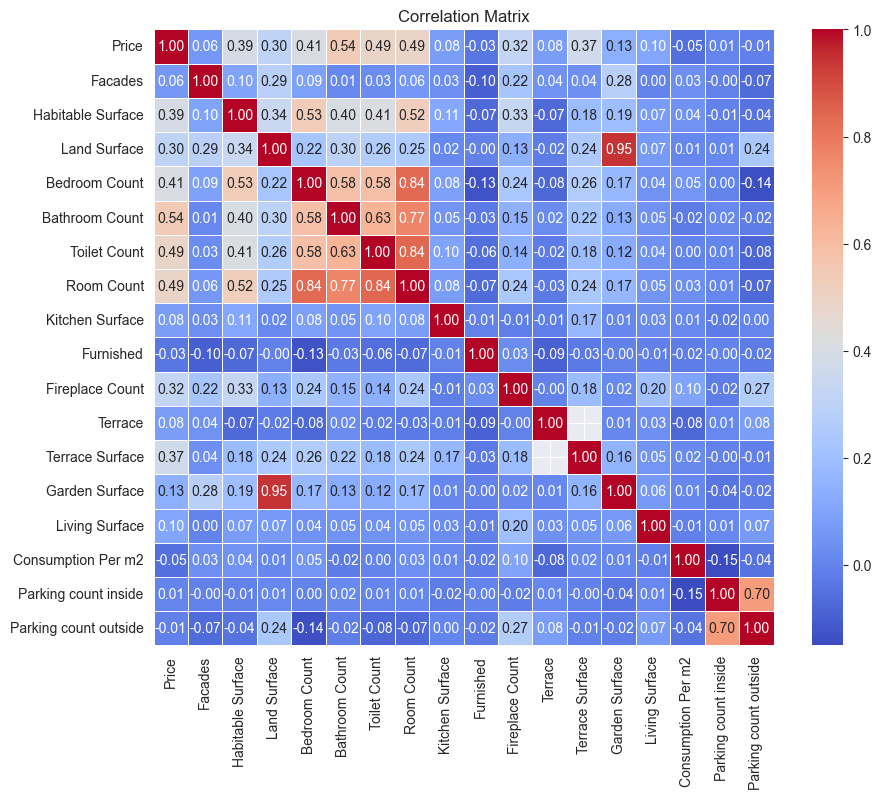

In [124]:
# First correlation matrix without transforming the data

correlation_matrix = immo_AP_H[immo_AP_H.select_dtypes(include=['int', 'float']).columns].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Taking care of Categorical features

### Building Year

In [125]:
# Building Year

print(f"Total observations: {immo_AP_H.shape[0]}")
print(f"Total 'Building Year' missing values: {immo_AP_H['Build Year'].isnull().sum()}")
print(f"Percentage of 'Building Year' missing values: {immo_AP_H['Build Year'].isnull().mean()}")

Total observations: 11043
Total 'Building Year' missing values: 3168
Percentage of 'Building Year' missing values: 0.28687856560717195


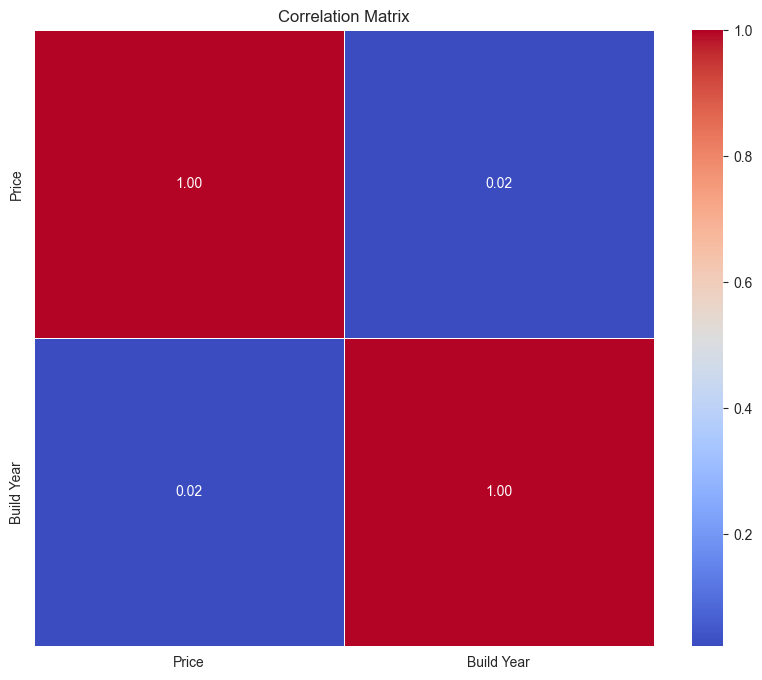

In [126]:
# Correlation between 'Price' and 'Sea View'

correlation_matrix = immo_AP_H[['Price', 'Build Year']].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [127]:
del immo_AP_H['Build Year']

We will not choose Building Year because it has a 28 percent null value and is 0.02 correlated with price, and we believe that the condition of the house is more important.

### Using One-Hot Encoding for Categorical features
One-Hot Encoding is a data processing technique commonly used in machine learning to handle categorical variables. It consists of converting a categorical column containing different categories into several binary columns (0 or 1), where each column represents a single category. The term "One-Hot" refers to the representation where a single value is coded as "1" (on) and all others are coded as "0" (off).

### Type feature

In [128]:
# Type
immo_AP_H.Type.unique()

array(['APARTMENT', 'HOUSE'], dtype=object)

In [129]:
print(f"Total observations: {immo_AP_H.shape[0]}")
print(f"Total 'Type' missing values: {immo_AP_H['Type'].isnull().sum()}")
print(f"Percentage of 'Type' missing values: {immo_AP_H['Type'].isnull().mean()}")

Total observations: 11043
Total 'Type' missing values: 0
Percentage of 'Type' missing values: 0.0


### One-hot-Encoding for Type feature

In [130]:
# Perform one-hot encoding for the 'Type' column
one_hot_encoded = pd.get_dummies(immo_AP_H['Type'])

# Convert True/False to 1/0
one_hot_encoded = one_hot_encoded.astype(int)

# Concatenate the original DataFrame with the one-hot-encoded columns
immo_AP_H_encoded = pd.concat([immo_AP_H, one_hot_encoded], axis=1)

# Delete the original 'Type' column
# immo_AP_H_encoded.drop(columns=['Type'], inplace=True)

In [131]:
immo_AP_H_encoded

,Price,Facades,Habitable Surface,Land Surface,Type,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,...,Living Surface,EPC,Consumption Per m2,Sea view,Parking count inside,Parking count outside,Municipality,Province,APARTMENT,HOUSE
0,220000,3.0,115.0,NaN,APARTMENT,3.0,1.0,2.0,6.0,10.0,...,34.0,C,187.0,NaN,1.0,1.0,WAREMME,LUIK,1,0
7,339000,3.0,134.0,NaN,APARTMENT,3.0,1.0,2.0,6.0,NaN,...,30.0,B,113.0,NaN,NaN,1.0,WETTEREN,OOST-VLAANDEREN,1,0
10,495000,2.0,134.0,NaN,APARTMENT,2.0,1.0,2.0,5.0,8.0,...,40.0,D,202.0,NaN,NaN,NaN,ELSENE,BRUSSEL,1,0
11,175000,2.0,90.0,NaN,APARTMENT,2.0,1.0,1.0,4.0,9.0,...,37.0,B,124.0,NaN,NaN,1.0,ANTWERPEN,ANTWERPEN,1,0
12,289000,2.0,80.0,NaN,APARTMENT,3.0,1.0,1.0,5.0,9.0,...,30.0,G,383.0,NaN,NaN,NaN,JETTE,BRUSSEL,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27224,210000,4.0,97.0,1394.0,HOUSE,3.0,1.0,1.0,5.0,NaN,...,45.0,G,550.0,NaN,1.0,1.0,VIROINVAL,NAMEN,0,1
27232,249000,2.0,78.0,NaN,APARTMENT,2.0,1.0,2.0,5.0,NaN,...,NaN,C,16075.0,NaN,NaN,NaN,LIÈGE,LUIK,1,0
27235,86000,3.0,115.0,120.0,HOUSE,2.0,1.0,1.0,4.0,NaN,...,15.0,G,954.0,NaN,1.0,NaN,THUIN,HENEGOUWEN,0,1
27237,198000,2.0,116.0,NaN,APARTMENT,3.0,NaN,1.0,4.0,NaN,...,46.0,B,165.0,NaN,1.0,NaN,CHARLEROI,HENEGOUWEN,1,0


In [132]:
print(f"Apartment Counts: {immo_AP_H_encoded.APARTMENT.value_counts()[1]}")
print(f"Hose Counts: {immo_AP_H_encoded.HOUSE.value_counts()[1]}")

Apartment Counts: 7575
Hose Counts: 3468


### Subtype feature

In [133]:
# Subtype

# immo_AP_H_encoded.Subtype.unique()

In [134]:
# print(f"Total observations: {immo_AP_H_encoded.shape[0]}")
# print(f"Total 'Subtype' missing values: {immo_AP_H_encoded['Subtype'].isnull().sum()}")
# print(f"Percentage of 'Subtype' missing values: {immo_AP_H_encoded['Subtype'].isnull().mean()}")

### One-hot-Encoding for Subtype feature

In [135]:
# # Perform one-hot encoding for the 'Subtype' column
# one_hot_encoded = pd.get_dummies(immo_AP_H_encoded['Subtype'])
# 
# # Convert True/False to 1/0
# one_hot_encoded = one_hot_encoded.astype(int)
# 
# # Concatenate the original DataFrame with the one-hot-encoded columns
# immo_AP_H_encoded = pd.concat([immo_AP_H_encoded, one_hot_encoded], axis=1)
# 
# # Delete the original 'Subtype' column
# immo_AP_H_encoded.drop(columns=['Subtype'], inplace=True)
# 
# immo_AP_H_encoded

### Swimming pool feature

In [136]:
# Swimming Pool

immo_AP_H_encoded['Swimming Pool'].unique()

array([False, nan, True], dtype=object)

In [137]:
print(f"Total observations: {immo_AP_H_encoded.shape[0]}")
print(f"Total 'Swimming Pool' missing values: {immo_AP_H_encoded['Swimming Pool'].isnull().sum()}")
print(f"Percentage of 'Swimming Pool' missing values: {immo_AP_H_encoded['Swimming Pool'].isnull().mean()}")

Total observations: 11043
Total 'Swimming Pool' missing values: 7173
Percentage of 'Swimming Pool' missing values: 0.6495517522412388


In [138]:
# Deleting Swimming Pool feature

del immo_AP_H_encoded['Swimming Pool']

<font color='red'><h3>We don't take 'Swimming Pool' as a relevant feature because there are more than 50% of missing values.<h3></font>

### State of Building feature

In [139]:
# State of Building

immo_AP_H_encoded['State of Building'].unique()

array(['GOOD', 'AS_NEW', 'TO_RENOVATE', nan, 'TO_BE_DONE_UP',
       'JUST_RENOVATED', 'TO_RESTORE'], dtype=object)

In [140]:
print(f"Total observations: {immo_AP_H_encoded.shape[0]}")
print(f"Total 'State of Building' missing values: {immo_AP_H_encoded['State of Building'].isnull().sum()}")
print(f"Percentage of 'State of Building' missing values: {immo_AP_H_encoded['State of Building'].isnull().mean()}")

Total observations: 11043
Total 'State of Building' missing values: 4313
Percentage of 'State of Building' missing values: 0.39056415829031965


In [141]:
# Encoding Estate of Building

estate_of_building_encoder = {
    'TO_RESTORE': 0, 
    'TO_RENOVATE': 1, 
    'TO_BE_DONE_UP': 2, 
    'GOOD': 3, 
    'JUST_RENOVATED': 4, 
    'AS_NEW': 5
}

immo_AP_H_encoded['State of Building'] = immo_AP_H_encoded['State of Building'].map(estate_of_building_encoder)

immo_AP_H_encoded

,Price,Facades,Habitable Surface,Land Surface,Type,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,...,Living Surface,EPC,Consumption Per m2,Sea view,Parking count inside,Parking count outside,Municipality,Province,APARTMENT,HOUSE
0,220000,3.0,115.0,NaN,APARTMENT,3.0,1.0,2.0,6.0,10.0,...,34.0,C,187.0,NaN,1.0,1.0,WAREMME,LUIK,1,0
7,339000,3.0,134.0,NaN,APARTMENT,3.0,1.0,2.0,6.0,NaN,...,30.0,B,113.0,NaN,NaN,1.0,WETTEREN,OOST-VLAANDEREN,1,0
10,495000,2.0,134.0,NaN,APARTMENT,2.0,1.0,2.0,5.0,8.0,...,40.0,D,202.0,NaN,NaN,NaN,ELSENE,BRUSSEL,1,0
11,175000,2.0,90.0,NaN,APARTMENT,2.0,1.0,1.0,4.0,9.0,...,37.0,B,124.0,NaN,NaN,1.0,ANTWERPEN,ANTWERPEN,1,0
12,289000,2.0,80.0,NaN,APARTMENT,3.0,1.0,1.0,5.0,9.0,...,30.0,G,383.0,NaN,NaN,NaN,JETTE,BRUSSEL,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27224,210000,4.0,97.0,1394.0,HOUSE,3.0,1.0,1.0,5.0,NaN,...,45.0,G,550.0,NaN,1.0,1.0,VIROINVAL,NAMEN,0,1
27232,249000,2.0,78.0,NaN,APARTMENT,2.0,1.0,2.0,5.0,NaN,...,NaN,C,16075.0,NaN,NaN,NaN,LIÈGE,LUIK,1,0
27235,86000,3.0,115.0,120.0,HOUSE,2.0,1.0,1.0,4.0,NaN,...,15.0,G,954.0,NaN,1.0,NaN,THUIN,HENEGOUWEN,0,1
27237,198000,2.0,116.0,NaN,APARTMENT,3.0,NaN,1.0,4.0,NaN,...,46.0,B,165.0,NaN,1.0,NaN,CHARLEROI,HENEGOUWEN,1,0


### EPC feature

In [142]:
# EPC

immo_AP_H_encoded.EPC.unique()

array(['C', 'B', 'D', 'G', 'F', nan, 'A', 'E', 'A+', 'A++'], dtype=object)

In [143]:
print(f"Total observations: {immo_AP_H_encoded.shape[0]}")
print(f"Total 'State of Building' missing values: {immo_AP_H_encoded.EPC.isnull().sum()}")
print(f"Percentage of 'State of Building' missing values: {immo_AP_H_encoded.EPC.isnull().mean()}")

Total observations: 11043
Total 'State of Building' missing values: 4542
Percentage of 'State of Building' missing values: 0.4113012768269492


In [144]:
# Encoding EPC

epc_encoder = {
    'A++': 8,
    'A+': 7,
    'A': 6,
    'B': 5,
    'C': 4,
    'D': 3,
    'E': 2,
    'F': 1,
    'G': 0,
}

immo_AP_H_encoded['EPC'] = immo_AP_H_encoded['EPC'].map(epc_encoder)

immo_AP_H_encoded

,Price,Facades,Habitable Surface,Land Surface,Type,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,...,Living Surface,EPC,Consumption Per m2,Sea view,Parking count inside,Parking count outside,Municipality,Province,APARTMENT,HOUSE
0,220000,3.0,115.0,NaN,APARTMENT,3.0,1.0,2.0,6.0,10.0,...,34.0,4.0,187.0,NaN,1.0,1.0,WAREMME,LUIK,1,0
7,339000,3.0,134.0,NaN,APARTMENT,3.0,1.0,2.0,6.0,NaN,...,30.0,5.0,113.0,NaN,NaN,1.0,WETTEREN,OOST-VLAANDEREN,1,0
10,495000,2.0,134.0,NaN,APARTMENT,2.0,1.0,2.0,5.0,8.0,...,40.0,3.0,202.0,NaN,NaN,NaN,ELSENE,BRUSSEL,1,0
11,175000,2.0,90.0,NaN,APARTMENT,2.0,1.0,1.0,4.0,9.0,...,37.0,5.0,124.0,NaN,NaN,1.0,ANTWERPEN,ANTWERPEN,1,0
12,289000,2.0,80.0,NaN,APARTMENT,3.0,1.0,1.0,5.0,9.0,...,30.0,0.0,383.0,NaN,NaN,NaN,JETTE,BRUSSEL,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27224,210000,4.0,97.0,1394.0,HOUSE,3.0,1.0,1.0,5.0,NaN,...,45.0,0.0,550.0,NaN,1.0,1.0,VIROINVAL,NAMEN,0,1
27232,249000,2.0,78.0,NaN,APARTMENT,2.0,1.0,2.0,5.0,NaN,...,NaN,4.0,16075.0,NaN,NaN,NaN,LIÈGE,LUIK,1,0
27235,86000,3.0,115.0,120.0,HOUSE,2.0,1.0,1.0,4.0,NaN,...,15.0,0.0,954.0,NaN,1.0,NaN,THUIN,HENEGOUWEN,0,1
27237,198000,2.0,116.0,NaN,APARTMENT,3.0,NaN,1.0,4.0,NaN,...,46.0,5.0,165.0,NaN,1.0,NaN,CHARLEROI,HENEGOUWEN,1,0


### Sea view feature

In [145]:
# Sea view
immo_AP_H_encoded['Sea view'].unique()

array([nan, True], dtype=object)

In [146]:
print(f"Total observations: {immo_AP_H_encoded.shape[0]}")
print(f"Total 'Sea view' missing values: {immo_AP_H_encoded['Sea view'].isnull().sum()}")
print(f"Percentage of 'Sea view' missing values: {immo_AP_H_encoded['Sea view'].isnull().mean()}")

Total observations: 11043
Total 'Sea view' missing values: 11031
Percentage of 'Sea view' missing values: 0.9989133387666395


In [147]:
# Fill 'Sea view' null values with 0

immo_AP_H_encoded.fillna({'Sea view': 0}, inplace=True)

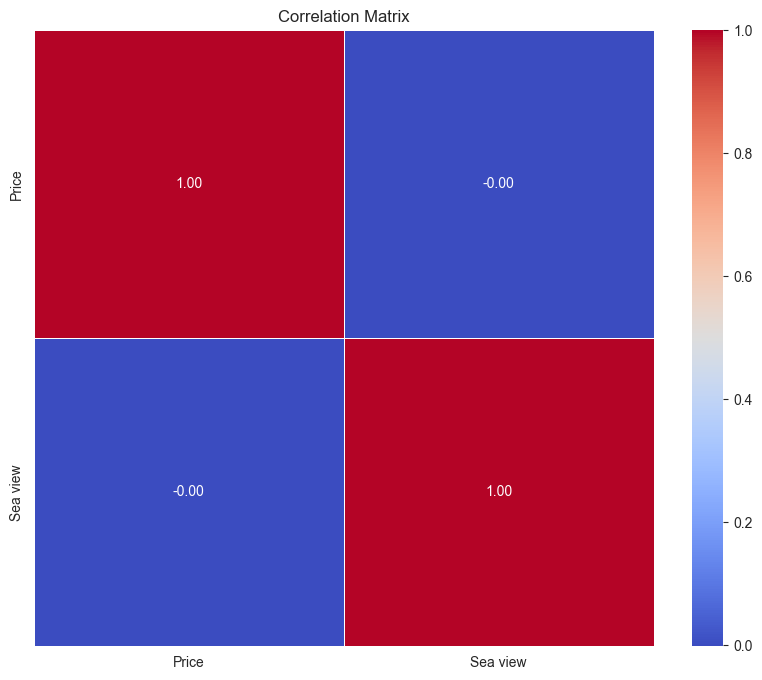

In [148]:
# Correlation between 'Price' and 'Sea View'

correlation_matrix = immo_AP_H_encoded[['Price', 'Sea view']].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 'Price' and 'Sea view' are not correlated at all

** we will not use it ** 

In [149]:
# Deleting 'Sea view' feature from our Dataset

del immo_AP_H_encoded['Sea view']

immo_AP_H_encoded

,Price,Facades,Habitable Surface,Land Surface,Type,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,...,State of Building,Living Surface,EPC,Consumption Per m2,Parking count inside,Parking count outside,Municipality,Province,APARTMENT,HOUSE
0,220000,3.0,115.0,NaN,APARTMENT,3.0,1.0,2.0,6.0,10.0,...,3.0,34.0,4.0,187.0,1.0,1.0,WAREMME,LUIK,1,0
7,339000,3.0,134.0,NaN,APARTMENT,3.0,1.0,2.0,6.0,NaN,...,3.0,30.0,5.0,113.0,NaN,1.0,WETTEREN,OOST-VLAANDEREN,1,0
10,495000,2.0,134.0,NaN,APARTMENT,2.0,1.0,2.0,5.0,8.0,...,3.0,40.0,3.0,202.0,NaN,NaN,ELSENE,BRUSSEL,1,0
11,175000,2.0,90.0,NaN,APARTMENT,2.0,1.0,1.0,4.0,9.0,...,3.0,37.0,5.0,124.0,NaN,1.0,ANTWERPEN,ANTWERPEN,1,0
12,289000,2.0,80.0,NaN,APARTMENT,3.0,1.0,1.0,5.0,9.0,...,3.0,30.0,0.0,383.0,NaN,NaN,JETTE,BRUSSEL,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27224,210000,4.0,97.0,1394.0,HOUSE,3.0,1.0,1.0,5.0,NaN,...,NaN,45.0,0.0,550.0,1.0,1.0,VIROINVAL,NAMEN,0,1
27232,249000,2.0,78.0,NaN,APARTMENT,2.0,1.0,2.0,5.0,NaN,...,3.0,NaN,4.0,16075.0,NaN,NaN,LIÈGE,LUIK,1,0
27235,86000,3.0,115.0,120.0,HOUSE,2.0,1.0,1.0,4.0,NaN,...,NaN,15.0,0.0,954.0,1.0,NaN,THUIN,HENEGOUWEN,0,1
27237,198000,2.0,116.0,NaN,APARTMENT,3.0,NaN,1.0,4.0,NaN,...,NaN,46.0,5.0,165.0,1.0,NaN,CHARLEROI,HENEGOUWEN,1,0


### Kitchen Type feature

In [150]:
# Kitchen Type

immo_AP_H_encoded['Kitchen Type'].unique()

array([nan, 'INSTALLED', 'HYPER_EQUIPPED', 'SEMI_EQUIPPED',
       'USA_HYPER_EQUIPPED', 'USA_INSTALLED', 'USA_SEMI_EQUIPPED',
       'NOT_INSTALLED', 'USA_UNINSTALLED'], dtype=object)

In [151]:
print(f"Total observations: {immo_AP_H_encoded.shape[0]}")
print(f"Total 'Kitchen Type' missing values: {immo_AP_H_encoded['Kitchen Type'].isnull().sum()}")
print(f"Percentage of 'State of Building' missing values: {immo_AP_H_encoded['Kitchen Type'].isnull().mean()}")

Total observations: 11043
Total 'Kitchen Type' missing values: 2853
Percentage of 'State of Building' missing values: 0.25835370823145887


In [152]:
# Encoding Kitchen Type

kitchen_type_encoder = {
    'USA_HYPER_EQUIPPED': 3,
    'HYPER_EQUIPPED': 3,
    'USA_SEMI_EQUIPPED': 2,
    'SEMI_EQUIPPED': 2,
    'USA_INSTALLED': 1,
    'INSTALLED': 1,
    'USA_UNINSTALLED': 0,
    'NOT_INSTALLED': 0    
}

immo_AP_H_encoded['Kitchen Type'] = immo_AP_H_encoded['Kitchen Type'].map(kitchen_type_encoder)

immo_AP_H_encoded

,Price,Facades,Habitable Surface,Land Surface,Type,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,...,State of Building,Living Surface,EPC,Consumption Per m2,Parking count inside,Parking count outside,Municipality,Province,APARTMENT,HOUSE
0,220000,3.0,115.0,NaN,APARTMENT,3.0,1.0,2.0,6.0,10.0,...,3.0,34.0,4.0,187.0,1.0,1.0,WAREMME,LUIK,1,0
7,339000,3.0,134.0,NaN,APARTMENT,3.0,1.0,2.0,6.0,NaN,...,3.0,30.0,5.0,113.0,NaN,1.0,WETTEREN,OOST-VLAANDEREN,1,0
10,495000,2.0,134.0,NaN,APARTMENT,2.0,1.0,2.0,5.0,8.0,...,3.0,40.0,3.0,202.0,NaN,NaN,ELSENE,BRUSSEL,1,0
11,175000,2.0,90.0,NaN,APARTMENT,2.0,1.0,1.0,4.0,9.0,...,3.0,37.0,5.0,124.0,NaN,1.0,ANTWERPEN,ANTWERPEN,1,0
12,289000,2.0,80.0,NaN,APARTMENT,3.0,1.0,1.0,5.0,9.0,...,3.0,30.0,0.0,383.0,NaN,NaN,JETTE,BRUSSEL,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27224,210000,4.0,97.0,1394.0,HOUSE,3.0,1.0,1.0,5.0,NaN,...,NaN,45.0,0.0,550.0,1.0,1.0,VIROINVAL,NAMEN,0,1
27232,249000,2.0,78.0,NaN,APARTMENT,2.0,1.0,2.0,5.0,NaN,...,3.0,NaN,4.0,16075.0,NaN,NaN,LIÈGE,LUIK,1,0
27235,86000,3.0,115.0,120.0,HOUSE,2.0,1.0,1.0,4.0,NaN,...,NaN,15.0,0.0,954.0,1.0,NaN,THUIN,HENEGOUWEN,0,1
27237,198000,2.0,116.0,NaN,APARTMENT,3.0,NaN,1.0,4.0,NaN,...,NaN,46.0,5.0,165.0,1.0,NaN,CHARLEROI,HENEGOUWEN,1,0


# Treating null values

In [153]:
# Retrieving null value count

immo_AP_H_encoded.isnull().sum()

Price                       0
Facades                  3223
Habitable Surface         327
Land Surface             7575
Type                        0
Bedroom Count               0
Bathroom Count           1549
Toilet Count             2863
Room Count                 63
Kitchen Surface          8133
Kitchen Type             2853
Furnished                   0
Fireplace Count          8202
Terrace                     0
Terrace Surface          3682
Garden Surface           9173
State of Building        4313
Living Surface           6139
EPC                      4542
Consumption Per m2       4969
Parking count inside     7527
Parking count outside    7408
Municipality                0
Province                    0
APARTMENT                   0
HOUSE                       0
dtype: int64

In [154]:
immo_AP_H_encoded.isnull().mean()

Price                    0.000000
Facades                  0.291859
Habitable Surface        0.029612
Land Surface             0.685955
Type                     0.000000
Bedroom Count            0.000000
Bathroom Count           0.140270
Toilet Count             0.259259
Room Count               0.005705
Kitchen Surface          0.736485
Kitchen Type             0.258354
Furnished                0.000000
Fireplace Count          0.742733
Terrace                  0.000000
Terrace Surface          0.333424
Garden Surface           0.830662
State of Building        0.390564
Living Surface           0.555918
EPC                      0.411301
Consumption Per m2       0.449968
Parking count inside     0.681608
Parking count outside    0.670832
Municipality             0.000000
Province                 0.000000
APARTMENT                0.000000
HOUSE                    0.000000
dtype: float64

In [155]:
# 'Land Surface', 'Kitchen Surface', 'Fireplace Count', 'Garden Surface', 'Parking count inside' and 'Parking count outside' 
# They have more than 50% of null values.

del immo_AP_H_encoded['Land Surface']
del immo_AP_H_encoded['Kitchen Surface']
del immo_AP_H_encoded['Fireplace Count']
del immo_AP_H_encoded['Garden Surface']
del immo_AP_H_encoded['Parking count inside']
del immo_AP_H_encoded['Parking count outside']


In [156]:
immo_AP_H_encoded.isnull().mean()

Price                 0.000000
Facades               0.291859
Habitable Surface     0.029612
Type                  0.000000
Bedroom Count         0.000000
Bathroom Count        0.140270
Toilet Count          0.259259
Room Count            0.005705
Kitchen Type          0.258354
Furnished             0.000000
Terrace               0.000000
Terrace Surface       0.333424
State of Building     0.390564
Living Surface        0.555918
EPC                   0.411301
Consumption Per m2    0.449968
Municipality          0.000000
Province              0.000000
APARTMENT             0.000000
HOUSE                 0.000000
dtype: float64

### Group properties by municipality and property type, and within each group allow a price difference of up to 50000 euros between properties.
### Calculate the average of the selected features by groups and apply each average to the null values of each group.

In [157]:
# Define the columns for which you want to calculate the average
columns_for_means = ['Habitable Surface', 'Terrace Surface', 'Living Surface', 'Consumption Per m2']
# Define the columns for which you want to calculate the median
columns_for_median = ['Facades', 'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Type', 'State of Building', 'EPC']

# Function for calculating the price difference within each group
def price_difference(group):
    return group.max() - group.min() <= 1000

# Group by Municipality and type of property ('APARTMENT' or 'HOUSE'), and apply the price difference function
price_group = immo_AP_H_encoded.groupby(['Province', 'APARTMENT', 'HOUSE'])['Price'].apply(price_difference)

# Filter the groups that satisfy the price difference criteria
filtered_groups = price_group[price_group]

# Calculate the mean of each group for the specified columns
means_per_group = immo_AP_H_encoded.groupby(['Province', 'APARTMENT', 'HOUSE'])[columns_for_means].mean()
# Calculate the median of each group for the specified columns
medians_per_group = immo_AP_H_encoded.groupby(['Province', 'APARTMENT', 'HOUSE'])[columns_for_median].median()

print(means_per_group)
print(medians_per_group)

# Fill in the null values in each group with the calculated means.
immo_AP_H_imputed = immo_AP_H_encoded.copy()  

for group, mean in means_per_group.iterrows():
    group_mask = (immo_AP_H_imputed['Province'] == group[0]) & (immo_AP_H_imputed['APARTMENT'] == group[1]) & (immo_AP_H_imputed['HOUSE'] == group[2])
    immo_AP_H_imputed.loc[group_mask, columns_for_means] = immo_AP_H_imputed.loc[group_mask, columns_for_means].fillna(mean)
    
for group, median in medians_per_group.iterrows():
    group_mask = (immo_AP_H_imputed['Province'] == group[0]) & (immo_AP_H_imputed['APARTMENT'] == group[1]) & (immo_AP_H_imputed['HOUSE'] == group[2])
    immo_AP_H_imputed.loc[group_mask, columns_for_median] = immo_AP_H_imputed.loc[group_mask, columns_for_median].fillna(median)


                                 Habitable Surface  Terrace Surface  \
Province        APARTMENT HOUSE                                       
ANTWERPEN       0         1             205.541958        21.915179   
                1         0             111.186005        17.797069   
BRUSSEL         0         1             266.921053        26.571429   
                1         0             100.792100        18.045153   
HENEGOUWEN      0         1             190.474510        33.818182   
                1         0              86.301887        13.977143   
LIMBURG         0         1             214.466019        26.500000   
                1         0             101.113636        14.182692   
LUIK            0         1             174.976676        32.342593   
                1         0              96.372493        16.322259   
LUXEMBURG       0         1             209.087719        33.367347   
                1         0              90.643137        12.679070   
NAMEN 

In [158]:
immo_AP_H_imputed

,Price,Facades,Habitable Surface,Type,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,Furnished,Terrace,Terrace Surface,State of Building,Living Surface,EPC,Consumption Per m2,Municipality,Province,APARTMENT,HOUSE
0,220000,3.0,115.0,APARTMENT,3.0,1.0,2.0,6.0,1.0,0,1,16.322259,3.0,34.00000,4.0,187.0,WAREMME,LUIK,1,0
7,339000,3.0,134.0,APARTMENT,3.0,1.0,2.0,6.0,1.0,0,1,19.144320,3.0,30.00000,5.0,113.0,WETTEREN,OOST-VLAANDEREN,1,0
10,495000,2.0,134.0,APARTMENT,2.0,1.0,2.0,5.0,1.0,0,1,12.000000,3.0,40.00000,3.0,202.0,ELSENE,BRUSSEL,1,0
11,175000,2.0,90.0,APARTMENT,2.0,1.0,1.0,4.0,1.0,0,1,7.000000,3.0,37.00000,5.0,124.0,ANTWERPEN,ANTWERPEN,1,0
12,289000,2.0,80.0,APARTMENT,3.0,1.0,1.0,5.0,1.0,0,1,2.000000,3.0,30.00000,0.0,383.0,JETTE,BRUSSEL,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27224,210000,4.0,97.0,HOUSE,3.0,1.0,1.0,5.0,1.0,0,1,30.000000,3.0,45.00000,0.0,550.0,VIROINVAL,NAMEN,0,1
27232,249000,2.0,78.0,APARTMENT,2.0,1.0,2.0,5.0,1.0,0,1,19.000000,3.0,34.00885,4.0,16075.0,LIÈGE,LUIK,1,0
27235,86000,3.0,115.0,HOUSE,2.0,1.0,1.0,4.0,0.0,0,0,33.818182,3.0,15.00000,0.0,954.0,THUIN,HENEGOUWEN,0,1
27237,198000,2.0,116.0,APARTMENT,3.0,1.0,1.0,4.0,1.0,0,1,1.000000,5.0,46.00000,5.0,165.0,CHARLEROI,HENEGOUWEN,1,0


In [159]:
immo_AP_H_imputed.isnull().sum()

Price                 0
Facades               0
Habitable Surface     0
Type                  0
Bedroom Count         0
Bathroom Count        0
Toilet Count          0
Room Count            0
Kitchen Type          0
Furnished             0
Terrace               0
Terrace Surface       0
State of Building     0
Living Surface        0
EPC                   0
Consumption Per m2    0
Municipality          0
Province              0
APARTMENT             0
HOUSE                 0
dtype: int64

In [160]:
immo_AP_H_imputed.isnull().mean()

Price                 0.0
Facades               0.0
Habitable Surface     0.0
Type                  0.0
Bedroom Count         0.0
Bathroom Count        0.0
Toilet Count          0.0
Room Count            0.0
Kitchen Type          0.0
Furnished             0.0
Terrace               0.0
Terrace Surface       0.0
State of Building     0.0
Living Surface        0.0
EPC                   0.0
Consumption Per m2    0.0
Municipality          0.0
Province              0.0
APARTMENT             0.0
HOUSE                 0.0
dtype: float64

In [161]:
immo_AP_H_imputed.describe()

,Price,Facades,Habitable Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,Furnished,Terrace,Terrace Surface,State of Building,Living Surface,EPC,Consumption Per m2,APARTMENT,HOUSE
count,1.104300e+04,11043.000000,11043.000000,11043.000000,11043.000000,11043.000000,11043.000000,11043.000000,11043.000000,11043.00000,11043.000000,11043.000000,11043.000000,11043.000000,11043.000000,11043.000000,11043.000000
mean,4.149383e+05,2.691932,132.405700,2.442271,1.255456,1.489994,4.744725,1.811826,0.017658,0.77977,20.743575,3.959612,36.243937,4.626551,207.980797,0.685955,0.314045
std,2.949435e+05,0.826891,112.282161,1.290595,0.644762,0.848710,2.501428,0.998141,0.131712,0.41442,21.310083,1.196656,42.099455,1.555584,505.094037,0.464155,0.464155
min,3.000000e+04,1.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,-18.000000,0.000000,0.000000
25%,2.690000e+05,2.000000,88.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.00000,11.000000,3.000000,31.827225,4.000000,84.000000,0.000000,0.000000
50%,3.490000e+05,2.000000,109.000000,2.000000,1.000000,1.000000,4.000000,1.000000,0.000000,1.00000,18.045153,5.000000,35.203390,5.000000,152.109384,1.000000,0.000000
75%,4.590000e+05,3.000000,157.000000,3.000000,1.000000,2.000000,6.000000,3.000000,0.000000,1.00000,23.874214,5.000000,38.153846,6.000000,289.000000,1.000000,1.000000
max,7.650000e+06,7.000000,7819.000000,25.000000,20.000000,41.000000,61.000000,3.000000,1.000000,1.00000,973.000000,5.000000,4146.000000,8.000000,43792.000000,1.000000,1.000000


In [162]:
immo_AP_H_imputed[immo_AP_H_imputed['Room Count'] == 61]

,Price,Facades,Habitable Surface,Type,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,Furnished,Terrace,Terrace Surface,State of Building,Living Surface,EPC,Consumption Per m2,Municipality,Province,APARTMENT,HOUSE
4675,3200000,3.0,1820.0,HOUSE,20.0,20.0,21.0,61.0,3.0,0,0,21.915179,3.0,36.465753,4.0,371.896623,MECHELEN,ANTWERPEN,0,1


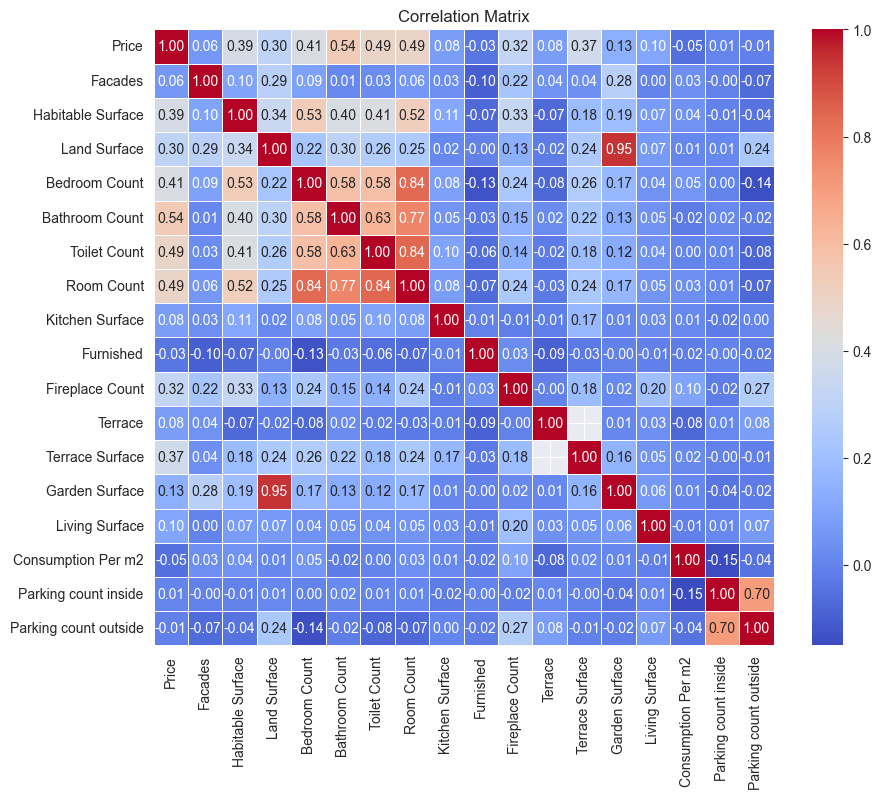

In [163]:
correlation_matrix = immo_AP_H[immo_AP_H.select_dtypes(include=['int', 'float']).columns].corr()
# correlation_matrix = immo_AP_H_imputed[immo_AP_H_imputed.columns[:-4].tolist()].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [167]:
# Save data from houses and apartments without nulls

immo_AP_H_imputed.to_csv('../data/raw/immo_house_apartment_not_null.csv', index=False)

# Treating outliers values

In [164]:

# for column in immo_AP_H_imputed.columns[:-4]:
#     plt.figure(figsize=(8, 6))
#     plt.boxplot(immo_AP_H_imputed[column])
#     plt.title(column)
#     plt.ylabel(column) 
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [ ]:

province_groups = immo_AP_H_imputed.groupby('Province')


fig, axs = plt.subplots(len(immo_AP_H_imputed.columns[:-4]), figsize=(20, 100))


for i, (col) in enumerate(immo_AP_H_imputed.columns):
    province_data = [group[1][col].dropna() for group in province_groups]
    
    plt.xticks(rotation=45)
    axs[i].boxplot(province_data)
    axs[i].set_title(col)
    axs[i].set_xticklabels(province_groups.groups.keys())

plt.tight_layout()

plt.show()

In [ ]:
# Looking for values < 0

immo_AP_H_imputed[immo_AP_H_imputed.loc[:,'Price':'Consumption Per m2'] < 0].count()

In [ ]:
# In the 'Consumption Per m2' are 5 values < 0

# Converting these values to positive

immo_AP_H_imputed['Consumption Per m2'] = immo_AP_H_imputed['Consumption Per m2'].abs()

In [61]:
immo_AP_H_imputed[immo_AP_H_imputed.loc[:,'Price':'Consumption Per m2'] < 0].count()

TypeError: '<' not supported between instances of 'str' and 'int'